<span style="color:red">
Disclaimer: Do not share this Python notebook to third parties <br>
Atencao: Nao compartilhe esse Python notebook com outras pessoas </span>
<h1><b>Networks in socio-economic systems </b></h1>
<h3>Prof Luis E C Rocha - luis.rocha@ugent.be</h3>
<h4>Dept of Economics and Dept of Physics and Astronomy</h4>
<h4>Ghent University, Belgium</h4>
<h4><b>Version:</b> Federal University of Uberlandia, Brazil - November 2023 </h4>

<h1><b>Lab 5: Theoretical models</b></h1>

<h3>Summary:</h3> The goal of this lab is to study theoretical network models, in particular, to learn how to generate such networks and study its properties. We will also see how to calculate the significance of empirical measures by estimating the $Z$-scores. In the second part, we will implement the Erdoes-Renyi model from scratch to practice mechanistic modelling and programming.

<h2><b>(0:00-1:15h) Part 1 </b></h2>

<h3><b>1.</b> Fundamental network models </h3>

There is a number of network models that you can use for different purposes. It is also common to design your own model based on specific rules to reproduce specific phenomenon. Some fundamental network models are already implemented in networkx, thus you can use those methods to generate theoretical networks.

For a list of network models provided by networkx, see https://networkx.github.io/documentation/stable/reference/generators.html. Not all models are relevant, therefore, do not spend time trying to understand all of them.

<h3><b>Exercise 1:</b> Degree distribution</h3>

The goal of this exercise is to generate networks using the networkx methods and study their respective degree distributions.

<ul>
    <li> Focus on the 4 models below that we have seen in class </li>
    <ul>
        <li> 2D Grid</li>
        <li> Erdos-Renyi model</li>
        <li> Watts-Strogatz model (2 versions)</li>
        <li> Barabasi-Albert model</li>
    </ul>
    <li> Study the degree distribution of the model networks for different parameters </li>
    <ul>
        <li> Check the respective networkx method online </li>
        <li> Generate at least 2-3 networks for each set of parameters for each network model. Why not only one simulation of the network? </li>
        <li> Use network size $N = 1000$ </li>
    </ul>
    <li> Generate first the degree distribution of the ER and BA models </li>
    <ul>
        <li> Compare the models for various parameter values
        <li> Use the same avg. degree (or a similar value) to compare different network models. Why? Because you want to see the effect of the generating mechanism in the structure and NOT the effect of the number of edges. If the density of edges is different, you might see different structures. </li>
        <li> (tip) Check lab 2 or lab 3 to refresh how to plot the degree distribution </li>
    </ul>
    <li> What are the degree distributions of the 2d grid and the WS model? </li>
    <ul>
        <li> Compare the 2 models for different parameter values </li>
    </ul>
    <li> Draw and visualise each network </li>
    <ul>    
        <li> In this case, use smaller networks, e.g. $N=100$ </li>
        <li> Try 2 methods to calculate the position of the nodes </li>
        <li> pos = nx.spring_layout(er) and pos = nx.circular_layout(er) </li>
        <li> Do you get the same visualisation of the same network? </li>
    </ul>
</ul>


No. nodes: 100
No. edges: 47


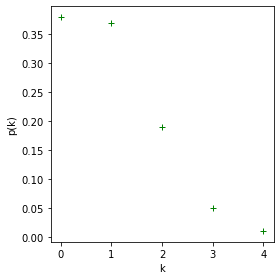

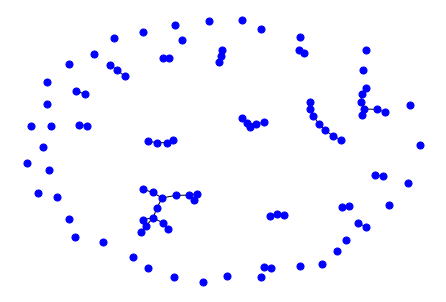

In [23]:
# Solutions

import networkx as nx
import matplotlib.pyplot as plt

# Attention: no need to create a graph entity using nx.Graph() or nx.DiGraph() if using the methods below

# m x n nodes grid network, with/without periodic boundary conditions
la = nx.grid_2d_graph(10, 10, periodic = False)

# Erdoes-Renyi model - 1000 nodes and probability 0.01
er = nx.erdos_renyi_graph(100, 0.01)#, seed = 1, directed = False)

# Watts-Strogats model - 100 nodes, 4 nearest neighbours, 0.1 rewiring probability
ws = nx.watts_strogatz_graph(1000, 4, 0.1)#, seed = None)

# Newman-Watts-Strogats model - similar to the model above but here links are added instead of rewired
ws2 = nx.newman_watts_strogatz_graph(1000, 4, 0.1)#, seed=None)

# Barabasi-Albert model - 100 nodes and 2 stubs (number of links per new node added to the network)
ba = nx.barabasi_albert_graph(1000, 2)#, seed = None)

# Attention: since multiple edges and self-loops might be generated, there might be a small mismatch in the final number of edges
# For larger networks (N>>1), the chance of this happening gets smaller, therefore, when using such models, set at least N=1000
#er.remove_edges_from( nx.selfloop_edges(er) )            # Remove self-loops
er = nx.Graph( er )                                       # Remove multiple edges

# Create a degree distribution to visualise the structure of the network
d_deg = nx.degree_histogram(er)                           # degree distribution
d_deg_n = [x / er.number_of_nodes() for x in d_deg]       # normalised degree distribution, i.e. pdf
x_deg = list( range(0, len(d_deg)) )                      # list of degree values

plt.figure(figsize = (4,4), tight_layout = True)
plt.ylabel('p(k)')
plt.xlabel('k')
#plt.ylim(0.0000001, 1)
#plt.xlim(1, 6000)
#plt.yscale('log')                          # For the Barabasi-Albert networks, you can uncomment this to use log-log scales
#plt.xscale('log')
plt.plot(x_deg, d_deg_n, 'g+')              # for the pdf plot

# Note that you can also use the module powerlaw to plot the pdf, see lab 3

print("No. nodes: %d" %er.number_of_nodes()) 
print("No. edges: %d" %er.number_of_edges())
# show the list of nodes
#print(er.nodes())

plt.show()

#nx.draw(er, with_labels = False, pos = nx.kamada_kawai_layout(er), node_size = 50, node_color = 'blue')
#nx.draw(er, with_labels = False, pos = nx.circular_layout(er), node_size = 50, node_color = 'blue')
nx.draw(er, with_labels = False, pos = nx.spring_layout(er), node_size = 50, node_color = 'blue')


<h3><b>Exercise 2:</b> Internal structures of theoretical models</h3>

The goal of this exercise is to study the clustering coefficient and shortest-paths of the network models from the previous exercise.

<ul>
    <li> Study the clustering coefficient and shortest-paths for the model networks </li>
    <ul>
        <li> 2D Grid</li>
        <li> Erdos-Renyi model</li>
        <li> Watts-Strogatz model (2 versions)</li>
        <li> Barabasi-Albert model</li>
    </ul>
    <li> For different set of parameters </li>
    <ul>
        <li> Calculate the average clustering coefficient of the network $\langle cc \rangle$ </li>
        <li> Calculate the average length of the shortest-paths of the network $\langle l \rangle$ </li>
     </ul>
    <li> Compare the results across models </li>
    <ul>
        <li> Always use the same (or similar) average degrees ($\langle k \rangle$). Why? because you want to be fair and compare networks with the same number of nodes $N$ and the same number of edges $E$ </li>
        <li> If you do not fix the average degree, some differences in the measures may emerge simply because the density of links is different, and not because of the emerging structures characteristic of each network model </li>
        <li> Is it also correct to compare the averages (of measures) of a single realisation (i.e. single sample) of the network? or should you use an average over several realisations of the algorithm (i.e. several samples)? Justify your choice </li>
    </ul>
    <li> For the WS model </li>
    <ul>
        <li> study $\langle cc \rangle$ and $\langle l \rangle$ if you vary the rewiring probability $q$ for a fixed number of nodes $N=1000$ </li>
        <li> Make a graph to show the results - "q" in the x-axis and network measures in the y-axis </li>
        <li> what if you change the size $N$ of the network, e.g. $N=256, 512, 1028, 2056, 4012$? Do you get different results for these measures? </li>
        <li> Make a graph to show the results - "N" in the x-axis and network measures in the y-axis for a fixed "q" </li>
        <li> (tip) if $\langle l \rangle$ is taking too long, analyse just $\langle cc \rangle$ in the class </li>
    </ul>
    <li> For ER and BA models </li>
    <ul>
        <li> do you see any differences in $\langle cc \rangle$ and $\langle l \rangle$ for different avg. degrees? </li>
        <li> always use the same (or similar) avg. degrees to compare two models </li>
        <li> what if you change the size $N$ of the network, e.g. $N=256, 512, 1028, 2056, 4012$ </li>
        <li> (tip) first generate the BA network, measure the avg. degree of the BA network, and then use this value to generate the ER network </li>
        <li> (tip) how can you estimate $p$ in the ER model using $\langle k \rangle$? See slides from week 6 </li>
        <li> Make a graph to show the results - "N" in the x-axis and network measures in the y-axis for a fixed "p" or fixed $\langle k \rangle$ </li>
    </ul>  
    <li> (homework) Compare the theoretical results (see slides from week 6) with the simulations </li>
    <ul>
        <li> (tip) see equations for the clustering coefficient and the avg. shortest paths in the slides </li>
        <li> (tip) use the average over several realisations for the comparison </li>
        <li> Are there differences? why?
    </ul>
</ul>


In [ ]:
# Solutions

# No specific solutions. Just look in the previous labs for the methods to make the calculations and 
# combine with the methods to generate the networks that were seen today.


<h3><b>2.</b> Configuration model </h3>

The configuration model is useful when one wants to create a random network where only the degree distribution is fixed. Note that one can actually design more advanced network models where other network properties are fixed from the start and the rest of the structure is randomised, for example, one can fix the distribution of triangles and the distribution of degrees simultaneously. For our purposes, however, only fixing the degree distribution is sufficient.

In the configuration model, the input is the sequence of node degree k, i.e. $\mathbf{k}=\{k_1, k_2, k_3, k_4, ..., k_N \}$. This sequence of degrees can come from an empirical network or be sampled from a given theoretical distribution (e.g. exponential, log-normal, or power-law), depending on the purpose of using this model. The model than randomly connect pairs of nodes, without changing the network degree distribution.
    

In [5]:
import networkx as nx

# Load an empirical network
G = nx.read_weighted_edgelist('./data/week2_email.edgelist.txt', comments = '#', nodetype = int, delimiter=',')#, encoding='utf-8')

# Remove multiple edges from G - if they exist
G = nx.Graph(G)

# Remove self-loops - if they exist
G.remove_edges_from( nx.selfloop_edges(G) )

# Extract the node degree sequence and assign to a list
# The same procedure we did earlier in the course to create a list of degrees for the histogram
k = [val for (node, val) in nx.degree(G)]

# Generate a configuration model based on the (list of) degree sequence
cm = nx.configuration_model(k)

# Unfortunately, this algorithm does not control for the creation of multiple edges and self-loops, 
# thus we have to remove them to make the calculations
# If you want to control it, you have to implement the model yourself (recommended, next exercise)

# remove eventual multiple edges and self-loops from the network "cm"
cm = nx.Graph(cm)
cm.remove_edges_from( nx.selfloop_edges(cm) )

print("(original network) E: %.0f | (randomised version) E: %.0f" %( nx.number_of_edges(G), nx.number_of_edges(cm) ) )

print("(original network) <cc>: %.4f | randomised version: %.4f" %( nx.average_clustering(G), nx.average_clustering(cm) ) )

# =========================================================
# Alternative way of implementing the configuration model
#cm = nx.configuration_model( dict(G.degree()).values() )
#cm = nx.Graph(cm)
#print( dict(G.degree()).values() )


E original network: 92013 | randomised version: 87825
<cc> original network: 0.0365 | randomised version: 0.0160


<h3><b>Exercise 3:</b> Configuration model</h3>

The goal of this exercise is to practice the generation of theoretical networks using the configuration model and an empirical degree distribution.

<ul>
    <li> Go to: https://users.ugent.be/~lcorread/courses/UFU/ </li>
    <li> Download the network data sets below </li>
    <ul>
        <li>1) Actor</li>
        <li>2) Collaboration</li>
        <li>3) Internet</li>
        <li>4) Power Grid</li>
        <li>5) Phone Calls</li>
        <li>6) Citation</li>
        <li>7) Email</li>
        <li>8) WWW</li>
        <li> Ps: Nodes are labelled from 0 continuously. Each line contains two node labels A and B, representing either a directed link A->B or an undirected link A-B. Undirected links appear only once in the file.</li>
    </ul>
    <li> See more details about these networks in the lab week 2 </li>
</ul>

<h4> Proposed analysis</h4>

<ul>
    <li> Compare a few measures in the original (empirical) network with the configuration model version </li>
    <ul>
        <li> no. nodes, no. edges, assortativity, avg. clustering coefficient, avg. centrality (choose the centrality you like most), avg.k-core, network core, you can also try the median instead of the mean, etc...</li>
        <li> are the differences the same if you generate different models for the same empirical network? Why?
    </ul>  
    <li> Can you quantify the difference between the empirical and random versions? how? </li>
    <ul>
        <li> If the difference is relatively small, what does it mean? </li>
        <li> If the difference is relatively large, what does it mean? </li>
    </ul>
    <li> What can you tell about the structure of the network? </li>
    <ul>
        <li> something about the organisation of the network? </li>
        <li> or about the mechanisms generating such structures? </li>
    </ul>
</ul>


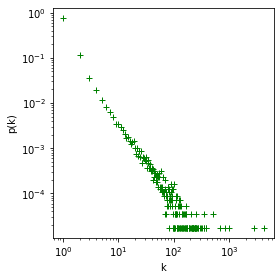

In [24]:
# Partial Solution

import networkx as nx
import matplotlib.pyplot as plt

# We start with an empirical network
G = nx.read_weighted_edgelist('./data/week2_email.edgelist.txt', comments = '#', nodetype = int, delimiter=',')#, encoding='utf-8')

G = nx.Graph(G)                                      # Remove multiple edges from G
G.remove_edges_from( nx.selfloop_edges(G) )          # Remove self-loops

# Get the degree sequence in a list
k = [val for (node, val) in nx.degree(G)]
cm = nx.configuration_model(k)
cm = nx.Graph(cm)

d_deg = nx.degree_histogram(cm)                      # degree distribution
d_deg_n = [x / cm.number_of_nodes() for x in d_deg]  # normalised degree distribution
x_deg = list( range(0, len(d_deg)) )                 # list of degree values

plt.figure(figsize = (4,4), tight_layout = True)
plt.ylabel('p(k)')
plt.xlabel('k')
#plt.ylim(0.0000001, 1)
#plt.xlim(1, 6000)
plt.yscale('log')
plt.xscale('log')
plt.plot(x_deg, d_deg_n, 'g+')

# You can also use the module powerlaw, see lab 3

plt.show()


# See previous labs for methods to make measures


<h3><b>3.</b> The significance of the results: Z-scores </h3>

The most usual application of the configuration model is to generate random networks with the same degree distribution as the empirical network, in order to calculate the $Z$-scores and assess the significance of a given network measure. Remember that this was briefly mentioned when we talked about motifs.

This is necessary because the degree distribution constrains the number of possible structures in the network. In other words, for a given degree distribution, even if the edges are random, we expect to observe some structures. 

Therefore, instead of studying the empirical measure only, we have to assess how statistically significant it is. This can be done by calculating the so-called $Z$-score:


$ Z\text{-score} = \dfrac{x_{\text{emp}} - \langle x\rangle_{\text{rand}}}{\sigma_{\text{rand}}} $


where, $x_{\text{emp}}$ is the measure in the empirical network, e.g. avg. clustering coefficient, assortativity, etc... and $\langle x\rangle_{\text{rand}}$ and $\sigma_{\text{rand}}$ are, respectively, the mean and the standard deviation of the same measure in the random version of the original network.

To calculate $\langle x\rangle_{\text{rand}}$ and $\sigma_{\text{rand}}$, it is necessary to generate several versions of the random network. On research, you have to generate at least $m=50$ (or more, depending on the structure you are studying). For the assignment, generate at least $m=5$ networks.

For a given $Z$-score, you can then calculate the significance level ($p$-value) and then decide if the results are statistically significant. A larger $Z$-score will provide a lower $p$-value, meaning that the probability of observing that value by chance is very low. Normally, $p<.05$ indicates that the result is statistically significant because there is only a $5\%$ chance of that value happening randomly (use this value). If $p<.01$, it is even better, thought this is a too restrictive requirement. If you want to read more details about that, see for example https://www.simplypsychology.org/z-score.html.

Below, I add a routine to calculate the $Z$-score and $p$-score. You just have to replace the measure that you want to study. 

When reporting your results, use the following formats: <br>
For example, for the clustering coefficient: <br>
$\langle cc \rangle = 0.35$, $p<.05 \rightarrow$ if the $p$-value$<0.05$ or <br>
$\langle cc \rangle = 0.35$, $p=0.32\rightarrow$ if the $p$-value$>0.05$, i.e. report the exact value of the $p$-value

Besides reporting the $p$-value, remember to discuss the results accordingly. Remember that a particular structure is present in the network only if $p<.05$, otherwise, that structure is just expect by chance.


In [11]:
# Steps to calculate the Z-score and respective p-values

# 1st: Calculate the network measure of interest in the empirical network

# 2nd: Generate a random network and calculate the same measure of interest
#      - repeat this at least 5 times
#      - calculate the mean (i.e. average) and standard deviation
import pandas as pd
import numpy as np

# Create a dataframe to store the measures of the random version
net_meas_random = pd.DataFrame(columns = ['cc'])

for i in range(5):                                      # generate only 5 random cases. If not too computationally costly (i.e. if it takes less than an hour), generate at least 10 random networks then.
    cm = nx.configuration_model(k)                      # Generate 1 sample of the network using the degree sequence k (see above)
    cm = nx.Graph(cm)                                   # Remove multiple edges
    cm.remove_edges_from( nx.selfloop_edges(cm) )       # Remove self-loops
    net_meas_random.loc[i,'cc'] = nx.average_clustering(cm)  # Calculate the avg. clustering of the sample network
    print("Network %d | Measure: %.5f" %(i, net_meas_random.loc[i,'cc']) )

print("The mean is %.5f" % net_meas_random.mean() )
print("The st_dev is %.5f" % net_meas_random.std() )

# 3rd: Calculate the Z-score for the chosen network measure

Z_score = (nx.average_clustering(G) - net_meas_random['cc'].mean())/ net_meas_random['cc'].std()

# 4th: Find the p-value
import scipy.stats
# The method below gives the probability "sf = 1 - cdf" , i.e. 1 minus the cumulative distribution function.
# Multiply by 2 because this gives one-tail of the distribution
# If you do not know the statistics behind this, see the link above for the explanation
p_value = scipy.stats.norm.sf( abs(Z_score) )*2.0    

# 5th: Assess the p-value
# If p-value < 0.05, then the result is statistically significant 
# That means the measure in the empirical network is statistically different than what would be expected by chance
# Note 1: As mentioned above, if p-value < 0.01, the difference is even stronger
# Any Z-score above 4 is significant and has p-value<0.00001
print("\nZ-score: %.2f and p-value = %.6f" %(Z_score, p_value) )


Network 0 | Measure: 0.01515
Network 1 | Measure: 0.01533
Network 2 | Measure: 0.01546
Network 3 | Measure: 0.01573
Network 4 | Measure: 0.01517
The mean is 0.01537
The st_dev is 0.00024

Z-score: 88.13 and p-value = 0.000000


<h1>15 min break! </h1>

<h2><b>(1:30-2:45h) Part 2 </b></h2>

<h3><b>4.</b> Implement the Erdoes-Renyi model</h3>

The goal of this exercise is to implement the Erdoes-Renyi random network model from scratch. This exercise is important because this model is relatively simple and working on the implementation will help you develop skills to implement more complicated models, that do not have a method in networkx, and think about mechanistic programming. 

<ul>
    <li> Create an Erdoes-Renyi random network without using the method from NetworkX </li>
    <ul>
        <li> Think about the definition of the random network </li>
        <li> (tip) see the slides from lecture 6 </li>
        <li> what are the parameters of the model? i.e. what has to be fixed? </li>
        <li> How do you add edges? How do you store the edges? </li>
        <li> (tip) do not bother to avoid self-loops and multiple edges in the first version of your model. Once you make it, then, you can add rules to avoid these undesirable structures </li>
    </ul>
    <li> General strategy </li>
    <ul>
        <li> break down the problem into steps. What is the first step? What is the second? etc... </li>
        <li> <b>draw the steps</b> in a piece of paper or tablet. It is definitely more difficult if you just try to development the algorithm on your mind </li>
        <li> (tip) you can "import random as rg" and use the method "rg.random()" to generate random numbers between 0 and 1 or "rg.randint(0, N-1)" to select an integer number between 0 and N-1</li>
    </ul>
    <li> Compare the results of your algorithm with the method from NetworkX </li>
    <ul>
        <li> Do you get a similar degree distribution? </li>
        <li> Do you get a similar assortativity? </li>
        <li> Do you get a similar avg. clustering coefficient? </li>
    </ul>
</ul>


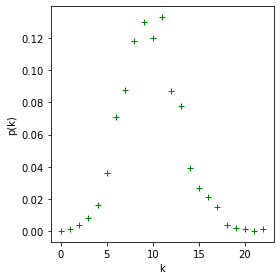

In [25]:
# Solutions

# There are two methods to make such a network

import networkx as nx
import random as rg

# METHOD 1

# Create an undirected graph
H = nx.Graph()

# Define the number of nodes and the probability of connecting them
N = 1000
p = 0.01
# What is the avg. degree of this network?

# Go through all pairs of nodes 
for i in range(N):
    for j in range(i+1, N):        # Why did I start here from i+1 instead of 0? (tip: the network is undirected)
        if rg.random() < p:        # For each pair of nodes, link them with a given probability | What rg.random() does?
            H.add_edge(i, j)       # If OK, add the edge to the network

# Plot the normalised degree distribution
d_deg = nx.degree_histogram(H)                      # degree distribution
d_deg_n = [x / H.number_of_nodes() for x in d_deg]  # normalised degree distribution
x_deg = list( range(0, len(d_deg)) )                # list of degree values

plt.figure(figsize = (4,4), tight_layout = True)
plt.ylabel('p(k)')
plt.xlabel('k')
plt.plot(x_deg, d_deg_n, 'g+') 

#list( H.nodes(data=True) ) # convert to a list and show the attributes of nodes
#list( H.edges(data=True) ) # convert to a list and show the attributes of nodes

# You can also plot the distribution using the module powerlaw, see lab 3

plt.show()


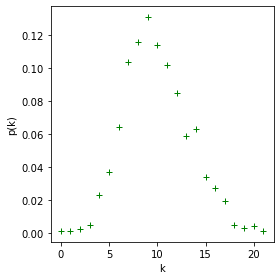

In [26]:
import networkx as nx
import random as rg

# METHOD 2

# Create an undirected graph
G = nx.Graph()

# Define the number of nodes and the number of edges
N = 1000
E = 5000
# What is the avg. degree of this network?

# Add nodes to the network - initially the network is thus without any edges
for i in range(N):
    G.add_node(i)

# Select a pair of nodes uniformily at random and add the link to the network
for i in range(E):              # Go through all edges
    no_1 = rg.randint(0, N-1)   # What rg.randint(0, N-1) does? Compare rg.randint(0, N-1) and rg.random() (see Method 1 above)
    no_2 = rg.randint(0, N-1)
    G.add_edge(no_1, no_2)      # Add pairs of nodes

# Plot the normalised degree distribution
d_deg = nx.degree_histogram(G)                      # degree distribution
d_deg_n = [x / G.number_of_nodes() for x in d_deg]  # normalised degree distribution
x_deg = list( range(0, len(d_deg)) )                # list of degree values

plt.figure(figsize = (4,4), tight_layout = True)
plt.ylabel('p(k)')
plt.xlabel('k')
plt.plot(x_deg, d_deg_n, 'g+') 

plt.show()


<h2><b>5.</b> Edge swapping model</h2>

The goal of this exercise is to implement the edge swapping model from scratch (see slides week 6). It is equivalent to the configuration model seen above, but more efficient for large networks. This exercise is more challenging than the previous, but it will help you develop skills for mechanistic programming.

<ul>
    <li> Randomise an empirical network without using the method from NetworkX</li>
    <ul>
        <li> See slides week 6 to recall how the edge swapping model works </li>
        <li> Break down the problem into steps. What is the first step? What is the second? etc...</li>
        <li> It may be easier to think about the undirected case only, but the same method can be used for directed networks </li>
    </ul>
    <li> Analysis
    <ul>
        <li> Is the degree distribution of the empirical and theoretical networks the same? Should they be the same or not?</li>
        <li> Do you get similar assortativity for both networks?</li>
        <li> Do you get similar avg. clustering coefficient for both networks?</li>
    </ul>
    <li> Compare the results of your algorithm and the configuration model from NetworkX</li>
</ul>


In [28]:
# Solution

import networkx as nx
import random as rg

G = nx.Graph()       # undirected graph

# We start with an empirical network
G = nx.read_weighted_edgelist('./data/week2_email.edgelist.txt', comments = '#', nodetype = int, delimiter=',')#, encoding='utf-8')

G = nx.Graph(G)                                 # Remove multiple edges
G.remove_edges_from( nx.selfloop_edges(G) )     # Remove self-loops

# Extract the list of edges of the network using "G.edges()". 
# It creates a tuple, then, we have to convert the tuple to a list of lists
list_edges_temp = [list(i) for i in list( G.edges() )] 

# Take the number of edges of the original empirical network
E = G.number_of_edges()

# Show the average clustering of the empirical network
print("(original network) <cc>: %.5f" %nx.average_clustering(G) )

# Repeat the following routine 4 times the total number of edges E
# Select 2 edges uniformly at random, e.g. (A,B) and (C,D)
# Swap ONE of the contacts, i.e. e.g. (A,B)->(C,B) and (C,D)->(A,D)
for i in range(4*E):
    
    # select 2 edges at random
    index1 = rg.randint(0, E-1)    # this function selects a position from 0 to E-1, i.e. edge 1
    index2 = rg.randint(0, E-1)    # this function selects a position from 0 to E-1, i.e. edge 2

    # Swap one of the contacts of edge 1 and one of the contacts of edge 2                 
    # Note that list_edges_temp is a list of E values, where each value is a list of size 2 i.e. [node_1, node_2]
    # store node "A" from the 1st edge "(A,B)" in temp
    temp = list_edges_temp[index1][0]
    # replace node "A" by node "C" (from the 2nd edge "(C,D)") -> now the 1st edge is "(C,B)"
    list_edges_temp[index1][0] = list_edges_temp[index2][0]
    # put node "A", that was in temp, in the place of node "C" -> now the 2nd edge is "(A,D)"
    list_edges_temp[index2][0] = temp

# Using the new list of edges (i.e. the randomised version), create a new network and analyse it

# Create a graph object Q
Q = nx.Graph()                     # undirected graph

# Add edges to graph Q using the list of edges
Q.add_edges_from(list_edges_temp)

# Show the average clustering of the new network
print("(randomised version) <cc>: %.5f" %nx.average_clustering(Q))


<cc> original network: 0.03655
<cc> randomised version: 0.01828
